In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # Convert labels to one-hot encoding

def create_model(hidden_units=None, activation=None):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(hidden_units[0], activation=activation), # Hidden Layer 1
        layers.Dense(hidden_units[1], activation=activation), # Hidden Layer 2
        layers.Dense(hidden_units[2], activation=activation), # Hidden Layer 3
        layers.Dense(10, activation='softmax')
    ])
    return model
hidden_units_list = [(512, 256, 128), (256, 128, 64), (1024, 512, 256)]
activation_list = ['relu', 'tanh', 'sigmoid']

results_dict = {}
counter = 1

# Loop through combinations of hidden units and activations
for hidden_units in hidden_units_list:
    for activation in activation_list:

        model = create_model(hidden_units=hidden_units, activation=activation)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

        _, test_acc = model.evaluate(x_test, y_test)

        model_info = { # Create a dictionary for the current iteration
            "Hidden units": hidden_units,
            "Activation": activation,
            "Test accuracy": round(test_acc * 100, 4)
        }

        results_dict[counter] = model_info # Add the current dictionary to the results dictionary

        counter += 1

for key, value in results_dict.items():
    print(f"Run {key}:")
    for info_key, info_value in value.items():
        print(f"{info_key}: {info_value}")
    print("- -" * 15) # Dict prints Separator

print("\n")

max_accuracy_run = max(results_dict, key=lambda k: results_dict[k]["Test accuracy"])
max_accuracy_info = results_dict[max_accuracy_run]
print("Run with the highest test accuracy:")
print(f"Run {max_accuracy_run}:")
for info_key, info_value in max_accuracy_info.items():
    print(f"{info_key}: {info_value}")


 16/313 [>.............................] - ETA: 1s - loss: 1.8940 - accuracy: 0.3105

KeyboardInterrupt: 

1/1 [==============================] - 0s 7ms/step


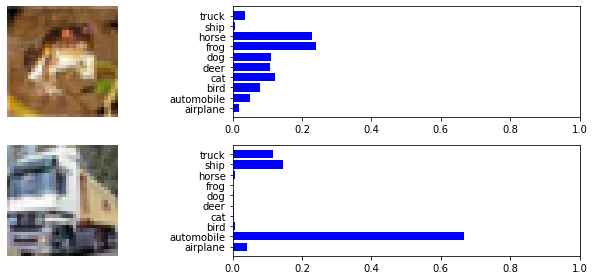

In [6]:
import matplotlib.pyplot as plt
num_images = 2
sample_images=x_train[:num_images]
predictions = model.predict(sample_images)

class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, axs = plt.subplots(num_images, 2, figsize=(10, 2 * num_images))

for i in range(num_images):
    # Plot the image
    axs[i, 0].imshow(sample_images[i])
    axs[i, 0].axis('off')

    # Plot the probability meter
    axs[i, 1].barh(class_labels, predictions[i], color='blue')
    axs[i, 1].set_xlim([0, 1])

plt.tight_layout()
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [14]:
(xtr,ytr),(xtst,ytst) = cifar10.load_data()
xtr = xtr/255
xtst=xtst/255
ytr,ytst = to_categorical(ytr),to_categorical(ytst)

In [32]:
def create_model(hidden_units=None,activation = None):
    model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(hidden_units[0],activation=activation),
        layers.Dense(hidden_units[1],activation=activation),
        layers.Dense(hidden_units[2],activation=activation),
        layers.Dense(10,activation='softmax')
    ])
    
    return model


hidden_units_list= [(512, 256, 128), (256, 128, 64), (1024, 512, 256)]
activation_list = ['sigmoid','relu','tanh']

result = {}
counter = 1

for hidden_units in hidden_units_list:
    for activation in activation_list:
        
        model = create_model(hidden_units=hidden_units,activation=activation)
        model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(xtr,ytr,epochs=5,batch_size= 64,validation_data=(xtst,ytst))
        _, acc = model.evaluate(xtst,ytst)
        
        model_info = {
            
            "hidden_units":hidden_units,
            "Activation": activation,
            "Test accuracy": round(test_acc * 100, 4)
        }
        result[counter] = model_info
        counter+= 1
        
for key , value in result.items():
    print(f"Run{key}:")
    for info_key , info_value in value.items():
        print(f"{info_key}:{info_value}")
    

Epoch 1/5
782/782 [==============================] - 28s 34ms/step - loss: 1.9233 - accuracy: 0.2949 - val_loss: 1.7949 - val_accuracy: 0.3482
Epoch 2/5
782/782 [==============================] - 25s 32ms/step - loss: 1.7623 - accuracy: 0.3623 - val_loss: 1.7409 - val_accuracy: 0.3699
Epoch 3/5
782/782 [==============================] - 25s 32ms/step - loss: 1.7111 - accuracy: 0.3815 - val_loss: 1.6570 - val_accuracy: 0.4028
Epoch 4/5
782/782 [==============================] - 24s 31ms/step - loss: 1.6628 - accuracy: 0.3993 - val_loss: 1.6371 - val_accuracy: 0.4159
Epoch 5/5
782/782 [==============================] - 23s 29ms/step - loss: 1.6254 - accuracy: 0.4126 - val_loss: 1.6207 - val_accuracy: 0.4161
Epoch 1/5
782/782 [==============================] - 27s 34ms/step - loss: 1.8802 - accuracy: 0.3178 - val_loss: 1.7533 - val_accuracy: 0.3673
Epoch 2/5
782/782 [==============================] - 24s 31ms/step - loss: 1.6905 - accuracy: 0.3936 - val_loss: 1.6386 - val_accuracy: 0.4271